In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from matplotlib.colors import ListedColormap,colorConverter

In [2]:
x0 = np.random.multivariate_normal([1,1],[[1,0],[0,1]],400)
y0 = np.zeros([400])
x1 = np.random.multivariate_normal([1,5],[[1,0],[0,1]],400)
y1 = np.ones([400])
x2 = np.random.multivariate_normal([5,1],[[1,0],[0,1]],400)
y2 = np.ones([400])
x3 = np.random.multivariate_normal([5,5],[[1,0],[0,1]],400)
y3 = np.zeros([400])
X = np.concatenate((x0,x1,x2,x3))
Y = np.concatenate((y0,y1,y2,y3))
X,Y = shuffle(X,Y)

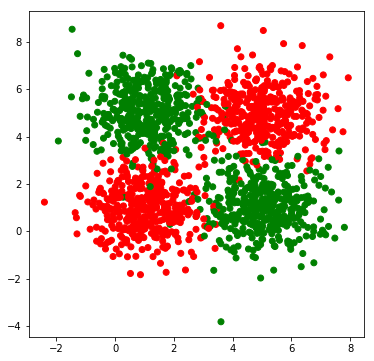

In [3]:
colors = ['r' if l == 0 else 'g' for l in Y[:]]
plt.figure(figsize=(6,6))
plt.scatter(X[:,0],X[:,1],c = colors)
plt.show()

In [4]:
x = tf.placeholder(dtype=tf.float32,shape=[None,2],name = "input")
y = tf.placeholder(dtype=tf.float32,shape=[None,1],name = "label")

In [5]:
weights = {
    "W1":tf.Variable(initial_value=tf.random_normal(shape=[2,20],mean=0,stddev=0.1),name = "W1"),
    "W2":tf.Variable(initial_value=tf.random_normal(shape=[20,1],mean=0,stddev=0.1),name = "W2")
}
bias = {
    "B1":tf.Variable(initial_value=tf.zeros([20]),name = "B1"),
    "B2":tf.Variable(initial_value=tf.zeros([1]),name = "B2")
}

In [6]:
lay_1 = tf.nn.sigmoid(tf.matmul(x,weights["W1"])+bias["B1"])
pred = tf.nn.tanh(tf.matmul(lay_1,weights["W2"])+bias["B2"])
cost = tf.reduce_mean(tf.square(y - pred))
opti = tf.train.GradientDescentOptimizer(0.04).minimize(cost)
re = int(pred)


In [7]:
init = tf.global_variables_initializer()
saver = tf.train.Saver(max_to_keep=2)
batch_size = 20
epochs = 200
num_inter = 80
Y = np.reshape(Y,[-1,1])
count = 0
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(epochs):
        for inter in range(num_inter):
            _,loss = sess.run([opti,cost],feed_dict = {x:X[inter*batch_size:(inter+1)*batch_size],y:Y[inter*batch_size:(inter+1)*batch_size]})
            count = count+1
            if count % 100 == 0:
                print("inter:{0},loss:{1}".format(count,loss))
                saver.save(sess,"overfittingSave/over.ckpt",global_step = count)

inter:100,loss:0.2485773265361786
inter:200,loss:0.2682197391986847
inter:300,loss:0.2598537504673004
inter:400,loss:0.25743308663368225
inter:500,loss:0.24193978309631348
inter:600,loss:0.26597318053245544
inter:700,loss:0.2520895004272461
inter:800,loss:0.2430305927991867
inter:900,loss:0.22632844746112823
inter:1000,loss:0.252170592546463
inter:1100,loss:0.23267602920532227
inter:1200,loss:0.22335577011108398
inter:1300,loss:0.20906999707221985
inter:1400,loss:0.2190796434879303
inter:1500,loss:0.2014807015657425
inter:1600,loss:0.19051556289196014
inter:1700,loss:0.17234845459461212
inter:1800,loss:0.14835406839847565
inter:1900,loss:0.14754140377044678
inter:2000,loss:0.12002889811992645
inter:2100,loss:0.11571310460567474
inter:2200,loss:0.09525550901889801
inter:2300,loss:0.11038106679916382
inter:2400,loss:0.07017552107572556
inter:2500,loss:0.08642148971557617
inter:2600,loss:0.07735447585582733
inter:2700,loss:0.09649404138326645
inter:2800,loss:0.04858992621302605
inter:2900

In [12]:
xx = np.linspace(-2,8,300)
yy = np.linspace(-2,8,300)
xs,ys = np.meshgrid(xx,yy)
result = np.zeros([300,300])
with tf.Session() as sess:
    sess.run(init)
    saver.restore(sess,"overfittingSave/over.ckpt-15900")
    for i in range(300):
        for j in range(300):
            a = []
            a.append(xs[i,j])
            a.append(ys[i,j])
            result[i,j] = sess.run(pred,feed_dict={x:np.reshape(a,[1,2])})
            if result[i,j]>0.5:
                result[i,j] = 1
            else:
                result[i,j] = 0

INFO:tensorflow:Restoring parameters from overfittingSave/over.ckpt-15900


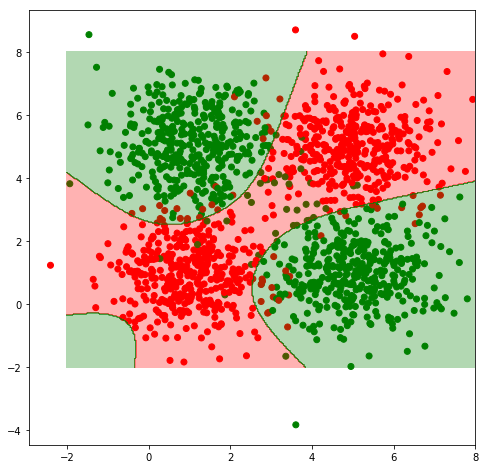

In [15]:
cmap = ListedColormap([
    colorConverter.to_rgba('r',alpha=0.3),
    colorConverter.to_rgba('g',alpha=0.3)
])
plt.figure(figsize=(8,8))
plt.scatter(X[:,0],X[:,1],c = colors)
plt.contourf(xs,ys,result,cmap = cmap)
plt.show()